# Proyecto Integrador IV
> E-Commerce Data Pipeline

En este notebook, primero ejecutaremos todos los componentes de nuestro pipeline ELT y luego realizaremos visualizaciones con la información resultante


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Aquí estarás extrayendo la información de las fuentes.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Usando los diferentes conjuntos de datos proporcionados, almacenarás todo en nuestro Data Warehouse.

In [4]:
load(data_frames=csv_dataframes, database=ENGINE)

Tabla 'olist_customers' cargada correctamente en la base de datos.
Tabla 'olist_geolocation' cargada correctamente en la base de datos.
Tabla 'olist_order_items' cargada correctamente en la base de datos.
Tabla 'olist_order_payments' cargada correctamente en la base de datos.
Tabla 'olist_order_reviews' cargada correctamente en la base de datos.
Tabla 'olist_orders' cargada correctamente en la base de datos.
Tabla 'olist_products' cargada correctamente en la base de datos.
Tabla 'olist_sellers' cargada correctamente en la base de datos.
Tabla 'product_category_name_translation' cargada correctamente en la base de datos.
Tabla 'public_holidays' cargada correctamente en la base de datos.


### 3. Transform

Aquí transformarás las diferentes consultas en tablas. Hay dos secciones: una con las consultas relacionadas con los ingresos y otra con las consultas relacionadas con las entregas.

##### 3.1 Queries sobre ingresos

In [5]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

In [6]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Ene,0.00,127545.67,1078606.86
1,02,Feb,0.00,271298.65,966510.88
2,03,Mar,0.00,414369.39,1120678.00
3,04,Abr,0.00,390952.18,1132933.95
4,05,May,0.00,567066.73,1128836.69
5,06,Jun,0.00,490225.60,1012090.68
6,07,Jul,0.00,566403.93,1027903.86
7,08,Ago,0.00,646000.61,985414.28
8,09,Sep,0.00,701169.99,0.00
9,10,Oct,46566.71,751140.27,0.00


In [7]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,cama_mesa_banho,11650,1692714.28
1,beleza_saude,9759,1620684.04
2,informatica_acessorios,7897,1549252.47
3,moveis_decoracao,8557,1394466.93
4,relogios_presentes,6063,1387046.31
5,esporte_lazer,8732,1349252.93
6,utilidades_domesticas,7172,1069787.97
7,automotivo,4283,833610.84
8,ferramentas_jardim,4464,810614.93
9,cool_stuff,3907,744649.32


In [8]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,seguros_e_servicos,2,324.51
1,fashion_roupa_infanto_juvenil,7,718.98
2,cds_dvds_musicais,14,1199.43
3,casa_conforto_2,31,1710.54
4,pc_gamer,9,1925.01
5,flores,33,2213.01
6,artes_e_artesanato,24,2326.17
7,la_cuisine,16,2913.53
8,fashion_esporte,29,3605.83
9,fraldas_higiene,37,4126.17


In [9]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Queries sobre entregas

In [10]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,Estado,Diferencia_Entrega
0,AC,-20
1,AL,-8
2,AM,-18
3,AP,-19
4,BA,-10
5,CE,-10
6,DF,-11
7,ES,-9
8,GO,-11
9,MA,-8


In [11]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Ene,NaN,8.602918,15.330987,NaN,38.093287,26.605709
1,02,Feb,NaN,10.331250,14.672381,NaN,34.958037,26.100344
2,03,Mar,NaN,11.908795,15.365344,NaN,25.756345,22.557836
3,04,Abr,NaN,12.813702,15.366259,NaN,26.809681,23.012420
4,05,May,NaN,12.943527,11.861215,NaN,24.909502,22.418769
5,06,Jun,NaN,11.679506,11.721084,NaN,24.614169,27.801868
6,07,Jul,NaN,11.289015,9.149208,NaN,23.095980,22.123831
7,08,Ago,NaN,11.000487,8.741144,NaN,23.493587,16.407960
8,09,Sep,NaN,12.487484,40.148743,NaN,22.067024,16.967427
9,10,Oct,14.480048,11.757649,114.608503,55.310101,23.644691,30.519884


In [12]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,estado_pedido,Cantidad
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [13]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [14]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Graficas de las tablas resultantes

Ahora, crearemos gráficos a partir de las diferentes consultas.

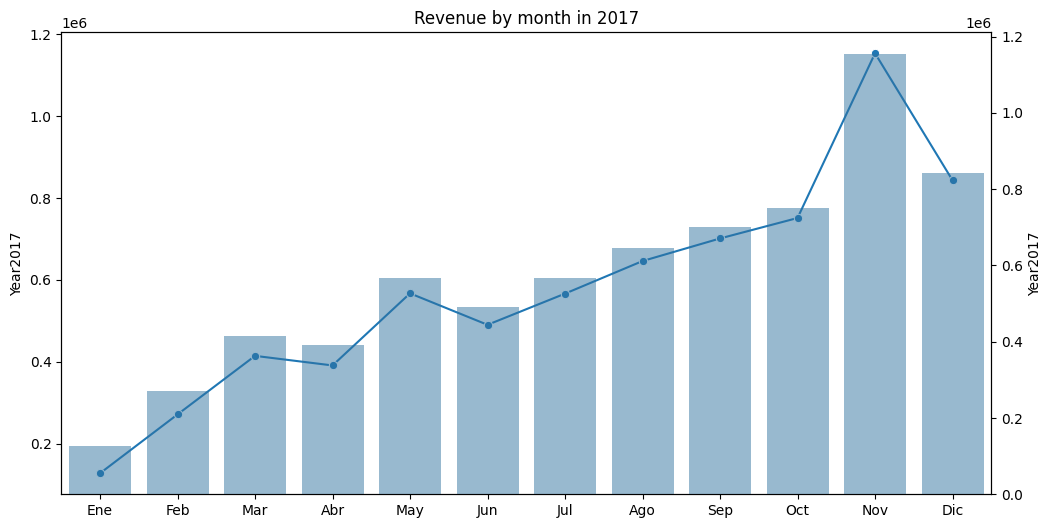

In [15]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [16]:
plot_top_10_revenue_categories(top_10_revenue_categories)

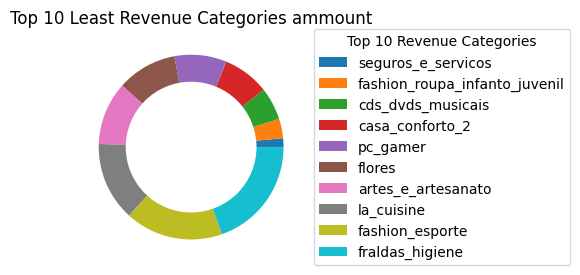

In [17]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [18]:
plot_revenue_per_state(revenue_per_state)

In [19]:
delivery_date_difference.columns

Index(['Estado', 'Diferencia_Entrega'], dtype='object')

In [20]:
from importlib import reload
import src.plots
reload(src.plots)

from src.plots import plot_delivery_date_difference


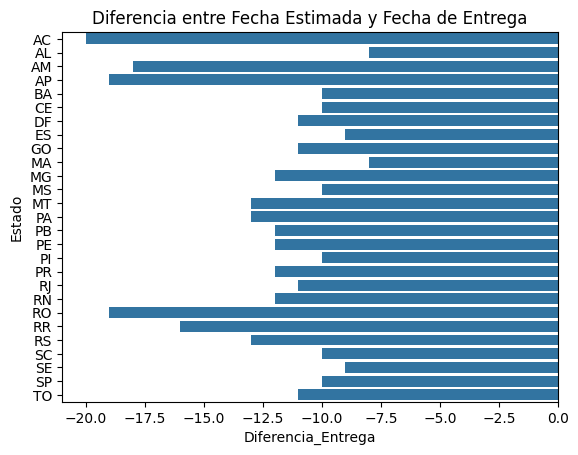

In [21]:
plot_delivery_date_difference(delivery_date_difference)

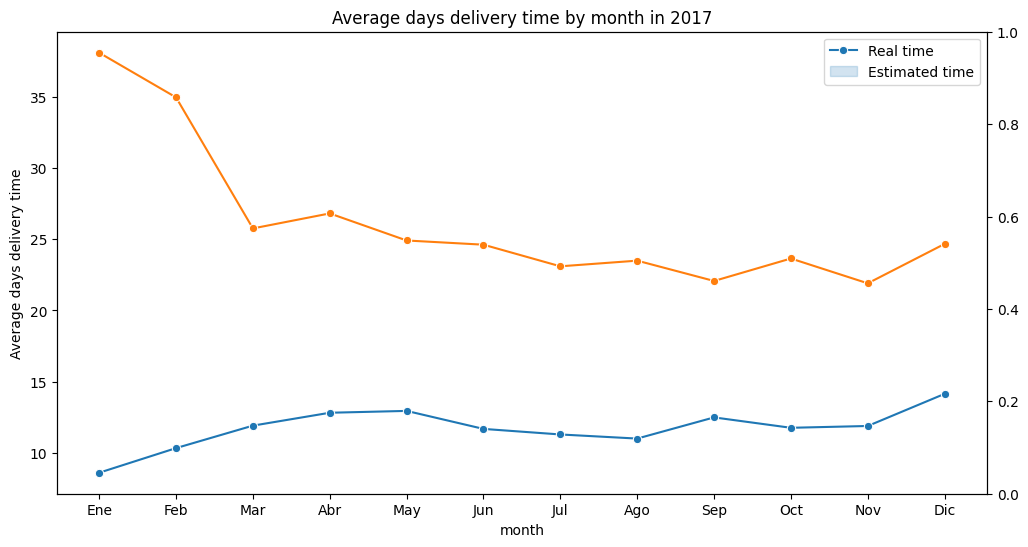

In [22]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

In [23]:
global_ammount_order_status.columns

Index(['estado_pedido', 'Cantidad'], dtype='object')

In [24]:
from importlib import reload
import src.plots  # importa el módulo

reload(src.plots)  # recarga el módulo para ver cambios sin reiniciar el kernel


<module 'src.plots' from 'f:\\desarrollo_soft\\PROYECTO_INTEGRADOR_IV\\proyecto_integrador\\src\\plots.py'>

In [25]:
from src.plots import plot_global_amount_order_status


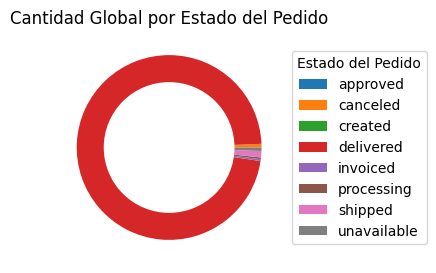

In [26]:
plot_global_amount_order_status(global_ammount_order_status)

In [27]:
from importlib import reload
import src.plots  # importa el módulo donde está la función

reload(src.plots)  # recarga el archivo plots.py con los nuevos cambios



<module 'src.plots' from 'f:\\desarrollo_soft\\PROYECTO_INTEGRADOR_IV\\proyecto_integrador\\src\\plots.py'>

In [28]:
from src.plots import plot_order_amount_per_day_with_holidays

In [29]:
print(query_results)
print(QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value)


{'delivery_date_difference':    Estado  Diferencia_Entrega
0      AC                 -20
1      AL                  -8
2      AM                 -18
3      AP                 -19
4      BA                 -10
5      CE                 -10
6      DF                 -11
7      ES                  -9
8      GO                 -11
9      MA                  -8
10     MG                 -12
11     MS                 -10
12     MT                 -13
13     PA                 -13
14     PB                 -12
15     PE                 -12
16     PI                 -10
17     PR                 -12
18     RJ                 -11
19     RN                 -12
20     RO                 -19
21     RR                 -16
22     RS                 -13
23     SC                 -10
24     SE                  -9
25     SP                 -10
26     TO                 -11, 'global_ammount_order_status':   estado_pedido  Cantidad
0      approved         2
1      canceled       625
2       created      

In [30]:
orders_per_day_and_holidays.head()

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False


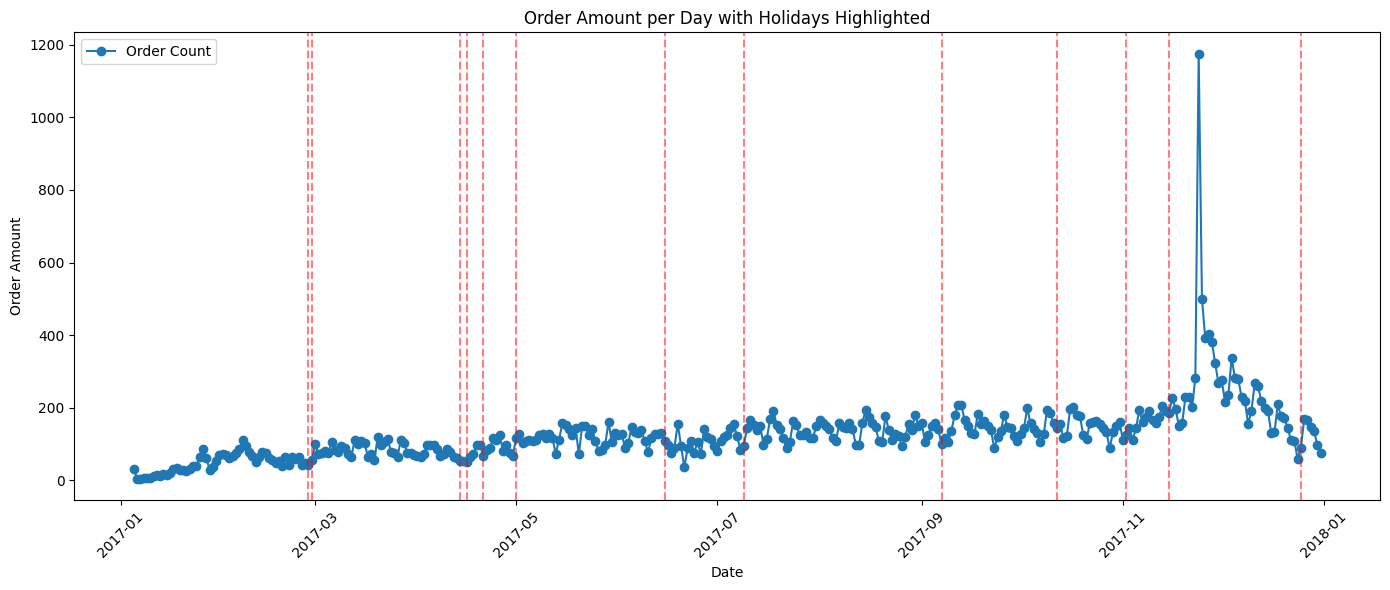

In [31]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

El gráfico de Pedidos por Día y Días Festivos que programarás en **src/plots.py** debe ser similar a este:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 ¿Ves alguna relación entre los días festivos en Brasil durante 2017 y las compras de ese año?

Respuesta: ________

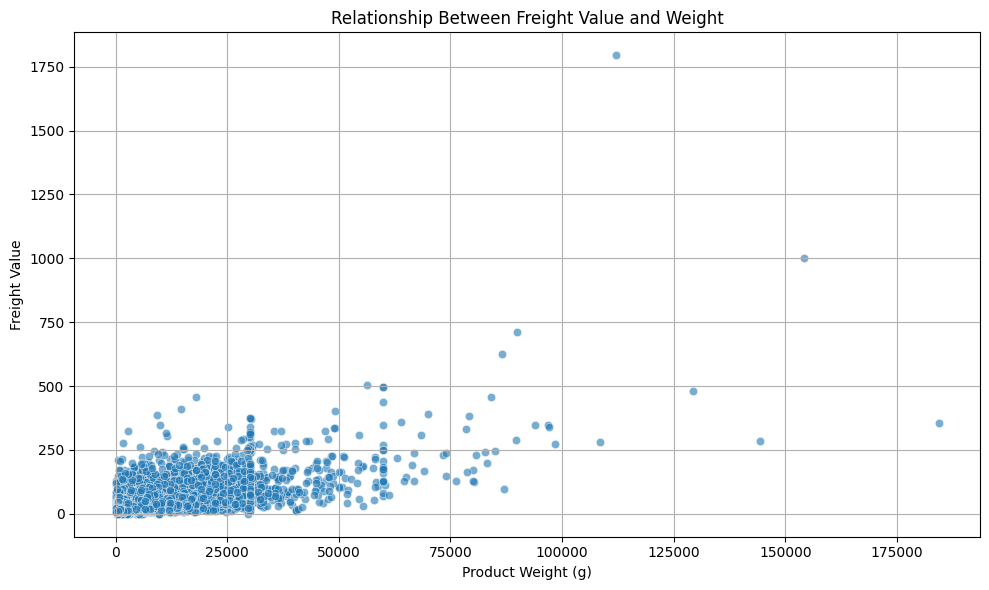

In [32]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

El gráfico sobre la relación entre el valor del flete y el peso del producto que debes programar en `src/plots.py` tiene que ser similar a este:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 ¿Ves alguna correlación entre el valor del flete y el peso del producto?

Respuesta:____